In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('energy_demand.csv', parse_dates=['date'])
df.head()

,date,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


## Relevant Questions

1. How do energy prices change throughout the year? Are there any patterns by season or month of the year?
2. Build a forecast of daily energy prices the company can use as the basis of its financial planning.
3. Provide guidance on how much revenue the energy storage venture could generate per year using retail prices and a 70MWh storage system.

## Data Preparation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2106 non-null   datetime64[ns]
 1   demand            2106 non-null   float64       
 2   price             2106 non-null   float64       
 3   demand_pos_price  2106 non-null   float64       
 4   price_positive    2106 non-null   float64       
 5   demand_neg_price  2106 non-null   float64       
 6   price_negative    2106 non-null   float64       
 7   frac_neg_price    2106 non-null   float64       
 8   min_temperature   2106 non-null   float64       
 9   max_temperature   2106 non-null   float64       
 10  solar_exposure    2105 non-null   float64       
 11  rainfall          2103 non-null   float64       
 12  school_day        2106 non-null   object        
 13  holiday           2106 non-null   object        
dtypes: datetime64[ns](1), fl

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df['solar_exposure'].isnull().any()

True

In [5]:
df['solar_exposure'].head()

0    23.6
1    26.8
2    26.5
3    25.2
4    30.7
Name: solar_exposure, dtype: float64

In [6]:
df['solar_exposure'].fillna(df['solar_exposure'].mean())

0       23.6
1       26.8
2       26.5
3       25.2
4       30.7
        ... 
2101    22.0
2102    19.8
2103     8.4
2104     7.3
2105     5.8
Name: solar_exposure, Length: 2106, dtype: float64

In [7]:
df['rainfall'].isnull().any()

True

In [8]:
df['rainfall'].fillna(df['rainfall'].mean())

0        0.0
1        0.0
2        0.0
3        4.2
4        0.0
        ... 
2101     0.0
2102     0.0
2103     0.0
2104    12.8
2105     1.0
Name: rainfall, Length: 2106, dtype: float64

In [9]:
df['school_day'].unique()

array(['N', 'Y'], dtype=object)

In [10]:
df['holiday'].unique()

array(['Y', 'N'], dtype=object)

## Exploratory Analysis 

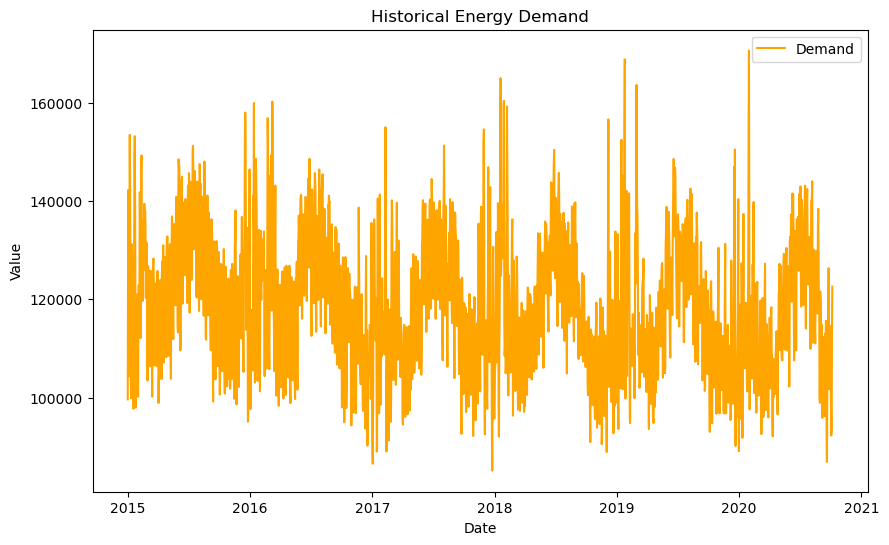

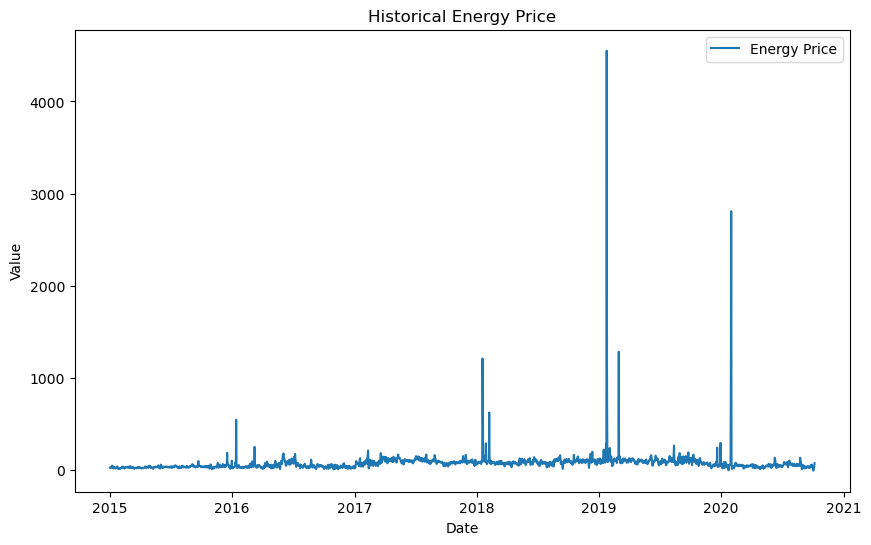

In [11]:
# Visualize energy price and demand over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['demand'], label='Demand', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Historical Energy Demand')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['price'], label='Energy Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Historical Energy Price')
plt.legend()
plt.show()

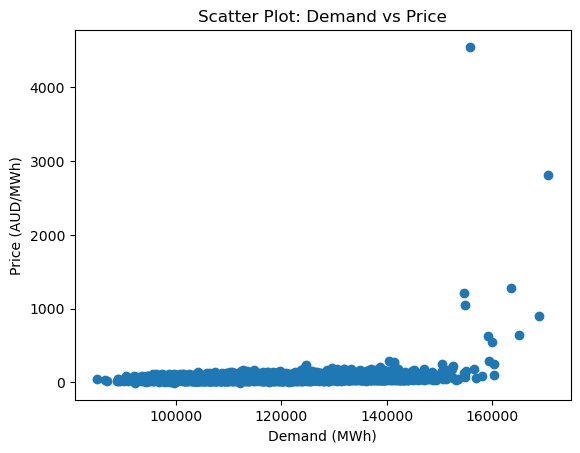

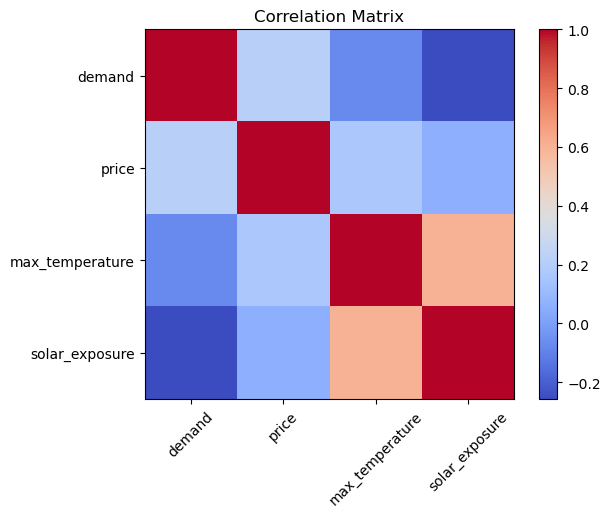

In [12]:
# Explore the relationship between variables
# Scatter plot
plt.scatter(df['demand'], df['price'])
plt.xlabel('Demand (MWh)')
plt.ylabel('Price (AUD/MWh)')
plt.title('Scatter Plot: Demand vs Price')
plt.show()

# Correlation analysis
correlation_matrix = df[['demand', 'price', 'max_temperature', 'solar_exposure']].corr()

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

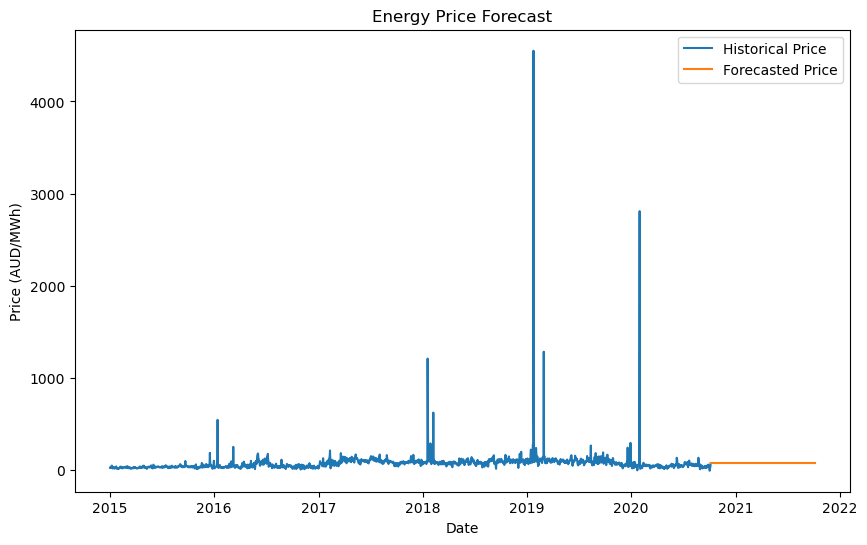

In [13]:
from sklearn.linear_model import LinearRegression

# Calculate average values for demand, max temperature, and solar exposure
average_demand = df['demand'].mean()
average_max_temperature = df['max_temperature'].mean()
average_solar_exposure = df['solar_exposure'].mean()

# Step 3: Generate future dates for forecasting
future_dates = pd.date_range(start='2020-10-06', periods=365, freq='D')

# Step 4: Use historical average values for future data
forecasted_data = pd.DataFrame({
    'date': future_dates,
    'demand': average_demand,
    'max_temperature': average_max_temperature,
    'solar_exposure': average_solar_exposure
})

# Generate energy price forecasts using the trained model
X = df[['demand', 'max_temperature', 'solar_exposure']].fillna(0)
y = df['price']

model = LinearRegression()
model.fit(X, y)

future_X = forecasted_data[['demand', 'max_temperature', 'solar_exposure']]
forecasted_prices = model.predict(future_X)

forecasted_data['forecasted_price'] = forecasted_prices

# Visualize the forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['price'], label='Historical Price')
plt.plot(forecasted_data['date'], forecasted_data['forecasted_price'], label='Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price (AUD/MWh)')
plt.title('Energy Price Forecast')
plt.legend()
plt.show()

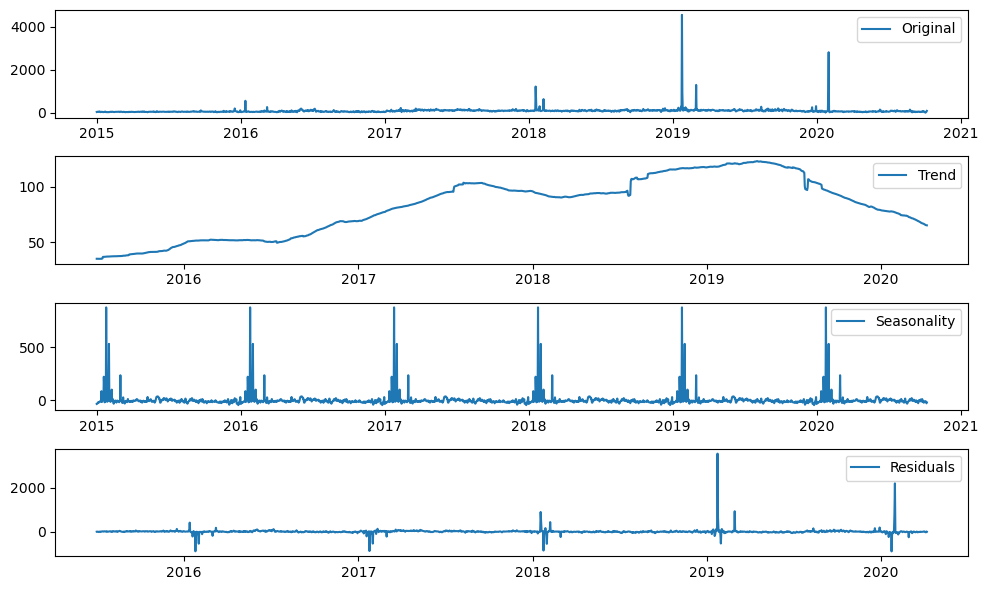

/home/mlefair/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mlefair/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mlefair/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mlefair/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mlefair/anacon

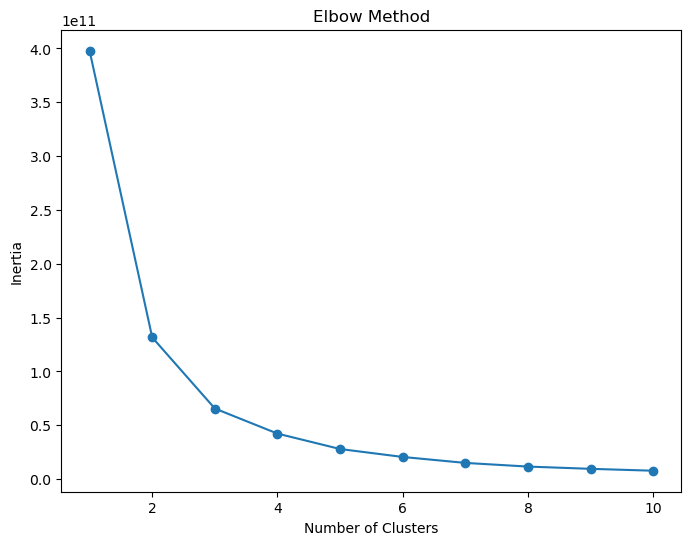

In [14]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['price'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df['date'], df['price'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(df['date'], trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(df['date'], seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(df['date'], residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

# Clustering analysis
from sklearn.cluster import KMeans

# Assume we want to cluster based on demand and price
X_cluster = df[['demand', 'price']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()




/home/mlefair/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


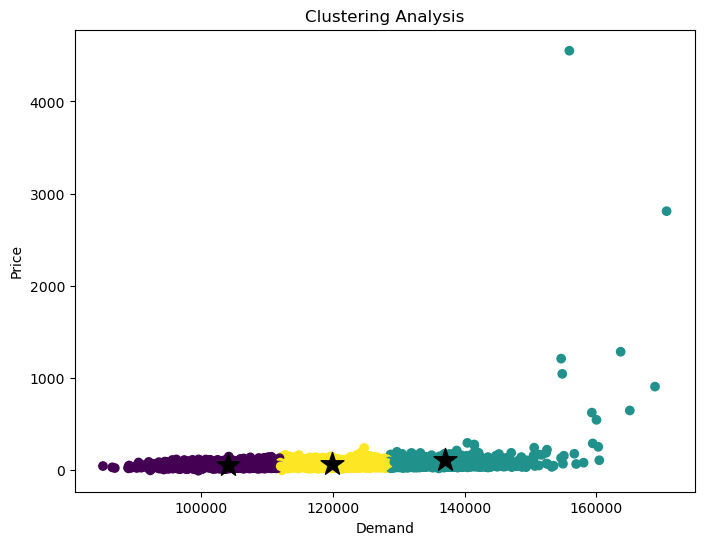

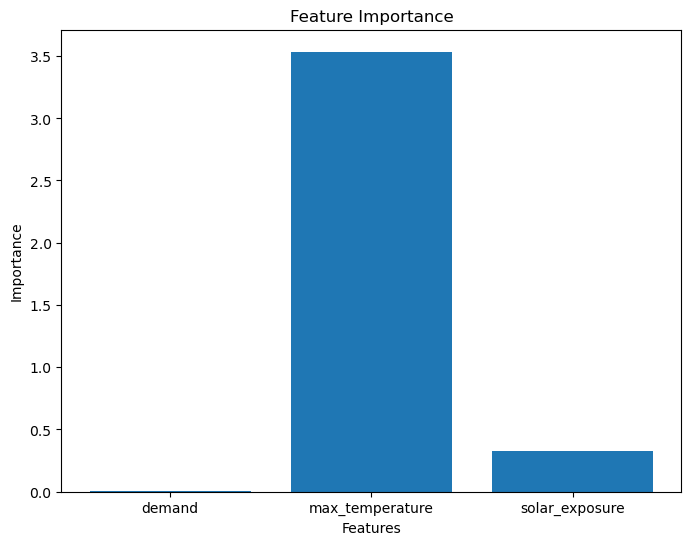

In [18]:
# Choose the number of clusters and perform clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_cluster)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_cluster['demand'], X_cluster['price'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='Centroids')
plt.xlabel('Demand')
plt.ylabel('Price')
plt.title('Clustering Analysis')
plt.show()

# Feature importance analysis
importance = model.coef_

plt.figure(figsize=(8, 6))
plt.bar(X.columns, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [19]:
# Calculate the price differentials
price_diff = df['price_positive'] - df['price_negative']

# Calculate the energy stored and sold per day
energy_stored_per_day = df['demand_neg_price'] * price_diff

# Calculate the utilization rate of the storage system
utilization_rate = energy_stored_per_day.sum() / (70 * len(df))

# Calculate revenue per day
revenue_per_day = utilization_rate * price_diff.mean() * 70

# Calculate annual revenue
annual_revenue = revenue_per_day * 365

print(f"Estimated annual revenue from the energy storage venture: {annual_revenue:.2f} AUD")


Estimated annual revenue from the energy storage venture: 1505852383.94 AUD
